<h1 align = "center" > Heart Attack Prediction</h1>

#### Attributes in the Dataset



age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholesterol in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

ca - number of major vessels (0-3) colored by fluoroscopy

thal - 2 = normal; 1 = fixed defect; 3 = reversible defect

num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/heart-attack/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-attack/heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
new_column= ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']

In [6]:
df.columns = new_column

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ['Total Missing Values'])


,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


**Analysis of the dataset**

The Data Set consists of 303 Rows and 14 Columns.

The type of all the variables in the data set are in numerical format. (Integer Or Float)

According to first impressions, there is no missing value(NaN Value) in the data set.

In [11]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ['Total Unique Values'])


,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


**Analysys of Numerical and Categorical variables**


I determined the variables with few unique values as categorical variables, and the variables with high unique values as numeric variables.

In this context, Numeric Variables: "age", "trtbps", "chol", "thalach" and "oldpeak"

Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

In the next section, I separated these 2 groups into 2 different lists.

In [12]:
numeric_var = ['age',"trtbps", "chol", "thalach", "oldpeak" ]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

## Numeric variables Analysis

In [13]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [14]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

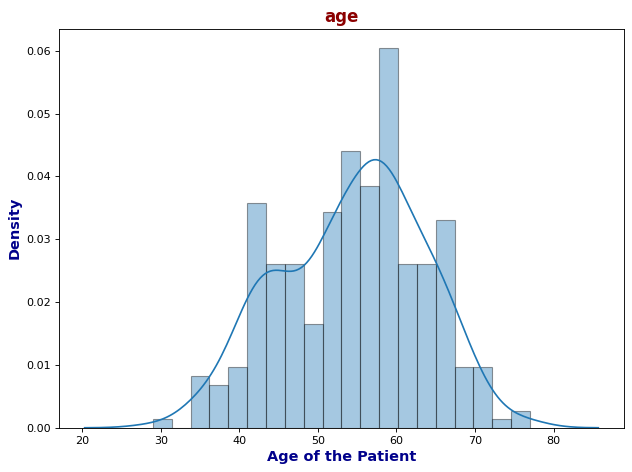

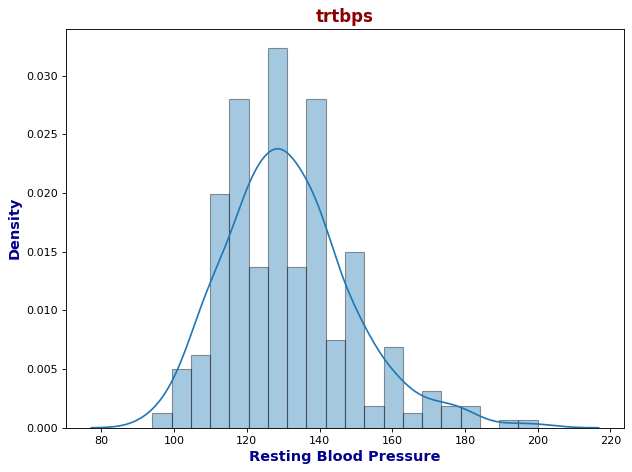

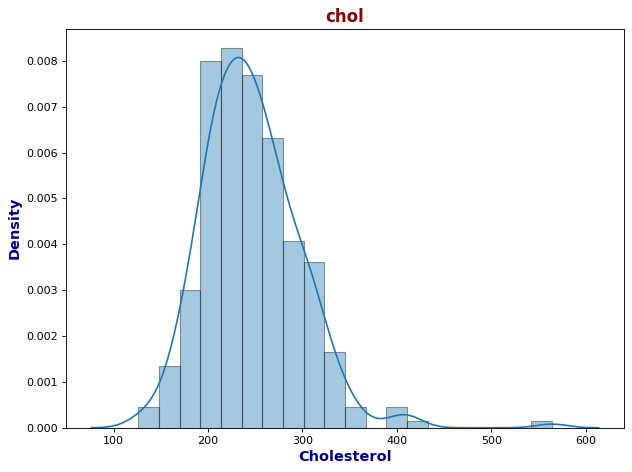

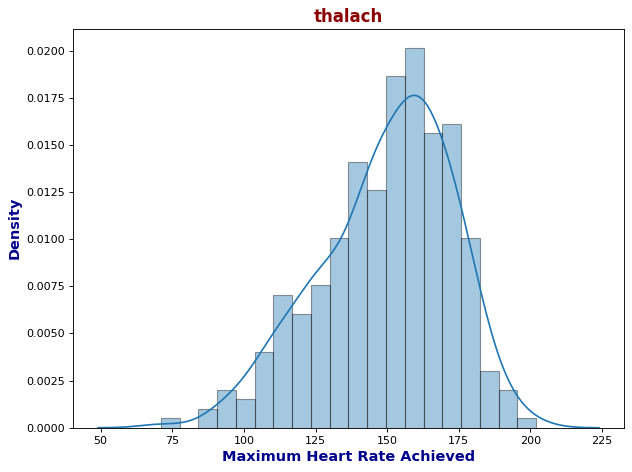

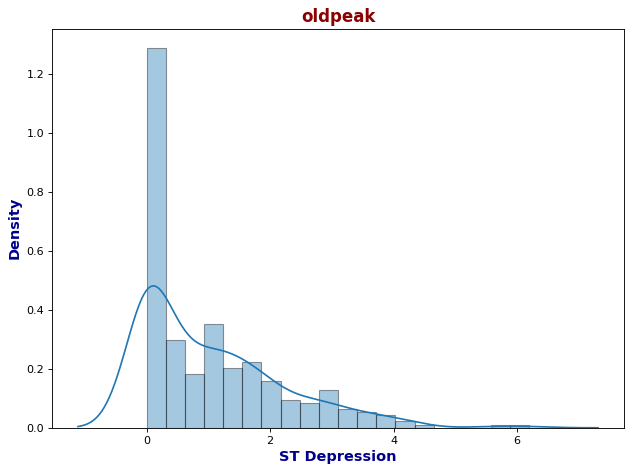

In [15]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()


## Analysis of Outputs

### Age Variable

The vast majority of patients are between 50 and 60 years old.

There is a notable decrease in patients between the ages of 47 and 50.

No outliers appear to be present in this variable.

### Trtbps Variable (Resting Blood Pressure)

Most patients have a resting blood pressure between 110 and 140.

Values above 180 can be considered outliers.

Significant patient concentrations at: 115–120,125–130, 155–160

### Cholesterol Variable

Cholesterol levels for most patients range between 200 and 280.

Values above 380 can be considered outliers.

### Thalach Variable (Maximum Heart Rate Achieved)

Most patients have a maximum heart rate between 145 and 170.

Values below 80 can be considered outliers.

### Oldpeak Variable (ST Depression)

Most patients have Oldpeak values between 0 and 1.5.

Values above 2.5 can be considered outliers.

## Categoric Variables Analysis

In [16]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [18]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [19]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [20]:
list(df["cp"].value_counts())


[143, 87, 50, 23]

In [21]:
list(df["cp"].value_counts().index)


[0, 2, 1, 3]

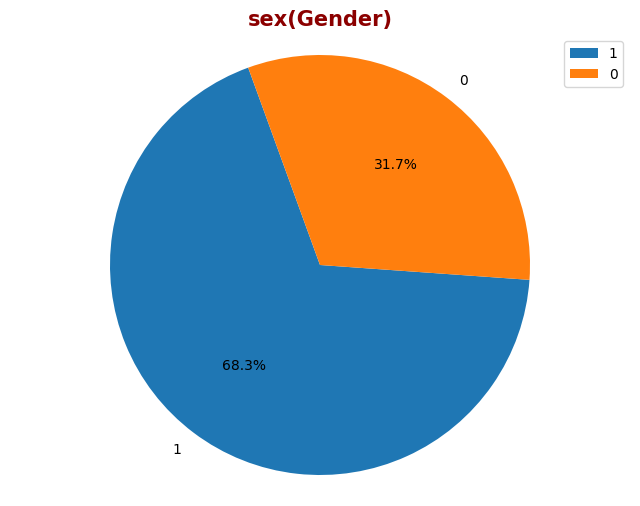

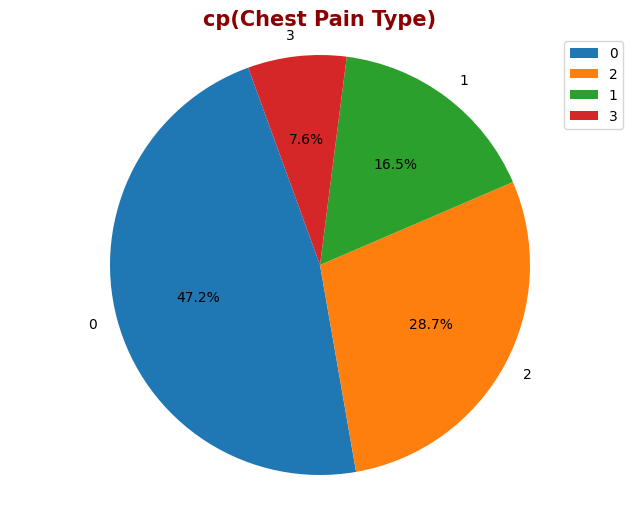

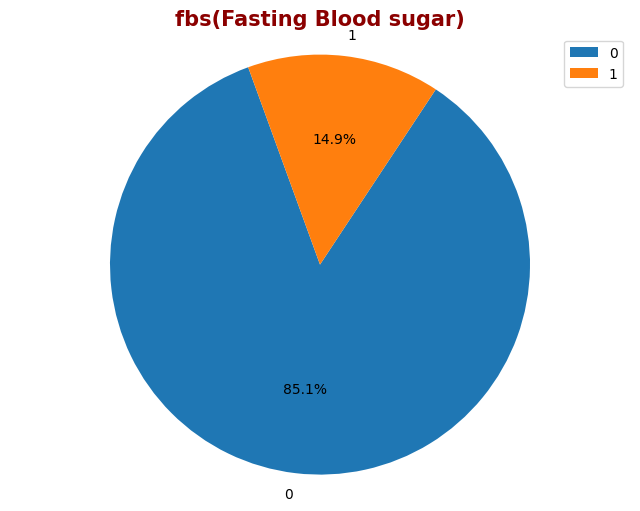

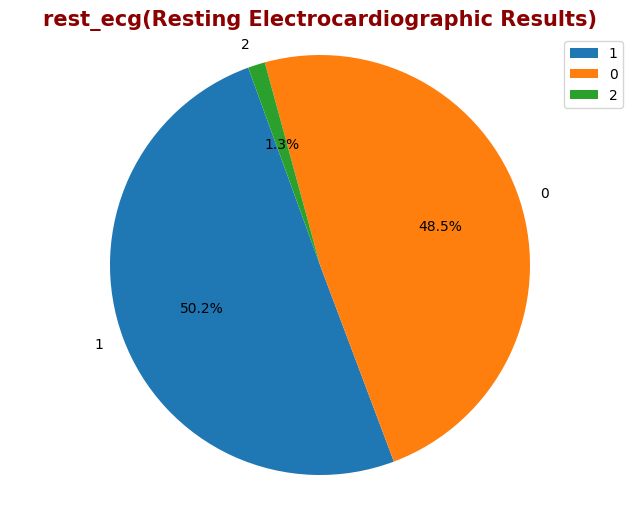

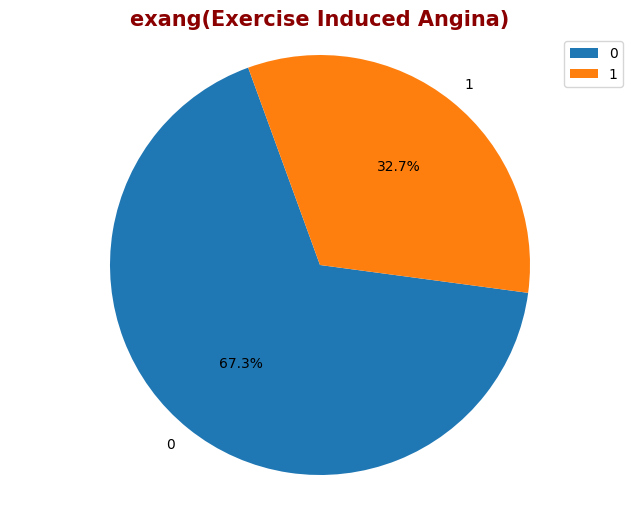

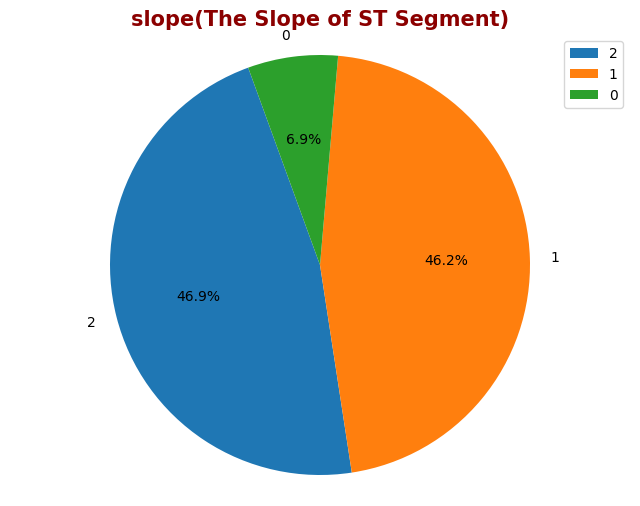

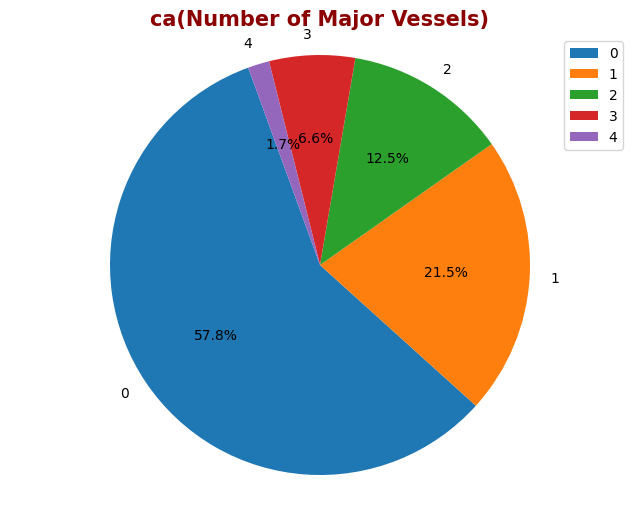

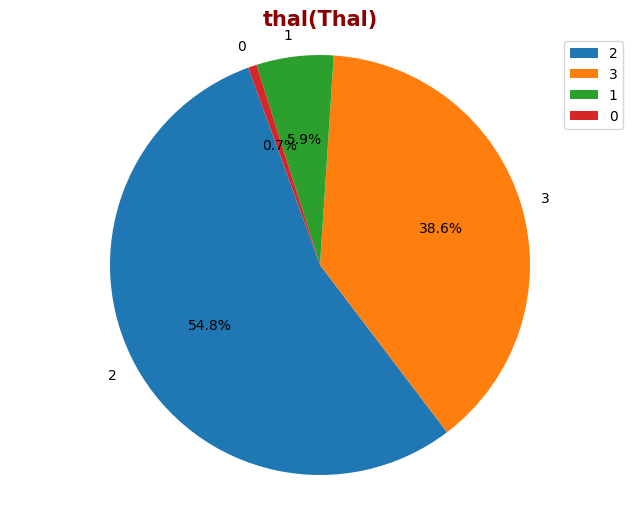

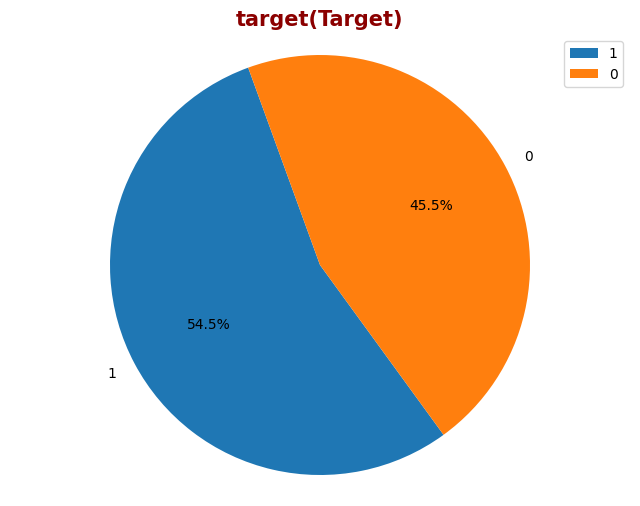

In [22]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

## Categoric Variables Observations From Pie chats Above

### Sex Variable
68.3% of the patients are male, 31.7% are female.

The number of male patients is more than twice that of female patients.

### Cp Variable (Chest Pain Type)
Almost 50% of patients have an observation value of 0 → Asymptomatic Angina.

These patients experience pain without symptoms.

Among the other 50%:

29% have an observation value of 2 → Atypical Angina.

These patients experience shortness of breath or non-classical chest pain.

16.5% have a value of 1 → Typical Angina.

Classic exertional pain occurring during physical activity.

8% have a value of 3 → Non-Anginal Pain.

Chest pain not related to heart disease or heart attacks.

### Fbs Variable (Fasting Blood Sugar)
85% of patients have fasting blood sugar > 120 mg/dl (value = 1).

15% have fasting blood sugar < 120 mg/dl (value = 0).

Rest_ecg Variable (Resting ECG Results)
1.3% of patients have an observation value of 2 → Negligible number, represents ST and T wavelength abnormalities.

Remaining patients are almost evenly split:

50.2% have a value of 1 → Normal ECG results.

48.5% have a value of 0 → Also considered normal.

### Exang Variable (Exercise-Induced Angina)
Represents chest pain caused by coronary artery spasms during exercise:

Value 1 → Pain with exercise.

Value 0 → Pain without exercise.

Values 0 are more than double compared to values 1.

More than half of the patients do not have exercise-induced angina.

### Slope Variable (Slope of the ST Segment)
7% have a value of 0 → Downward slope of the ST wavelength.

The rest are almost equally divided:

Value 1 → Flat slope (50%).

Value 2 → Upward slope (43%).

### Ca Variable (Number of Major Vessels Colored by Fluoroscopy)
57.8% have a value of 0 → No major vessels are colored.

21.5% have 1 major vessel colored.

Most patients have occluded vessels, so fluoroscopy cannot detect them.

### Thal Variable (Thallium Stress Test)
Test evaluates heart blood flow and coronary artery disease.

Four observation values: 0, 1, 2, 3.

**0 → Treated as null (need cleaning).**

Among valid values:

54.8% have a value of 2 → Normal result.

36.8% have a value of 3 → Reversible defect.

5.9% have a value of 1 → Fixed defect.

### Target Variable (Heart Attack Risk)
54.5% of patients are at risk of heart attack.

45.5% of patients have no risk.

## Filling the Missing Data in Thal

In [23]:
df[df["thal"] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [24]:
df["thal"] = df["thal"].replace(0, 2)


In [25]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [26]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer")

In [27]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [28]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [29]:
df["thal"].value_counts()


thal
2    168
3    117
1     18
Name: count, dtype: int64

## Bi-Variant Analysis

#### Numerical Variables - Target Variable(Analysis with FaceGrid)

In [30]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [31]:
numeric_var.append("target")


In [32]:
numeric_var


['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

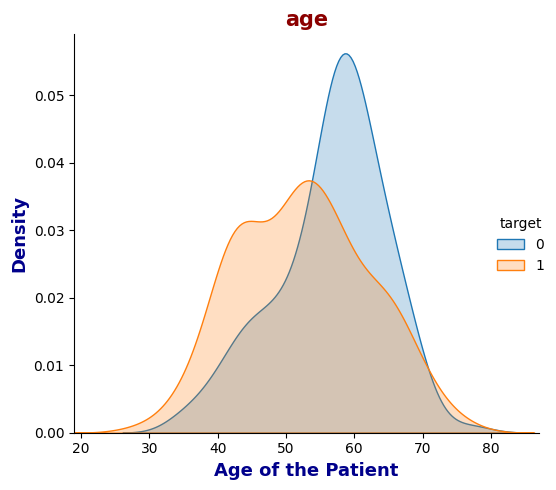

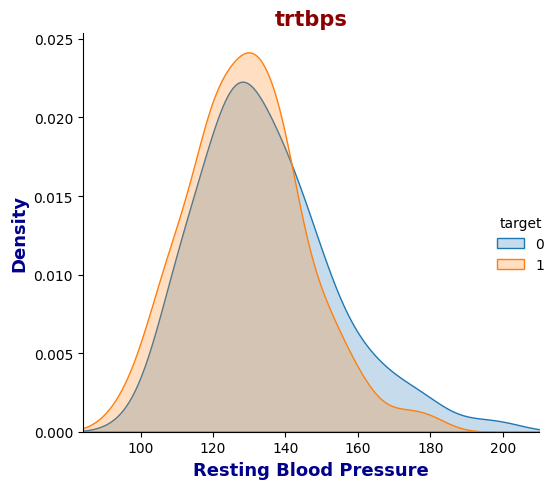

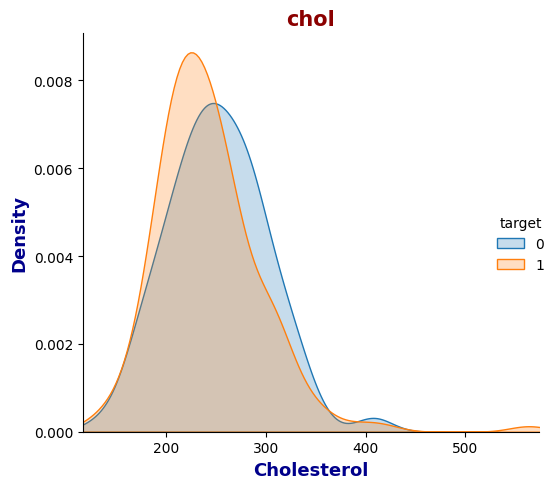

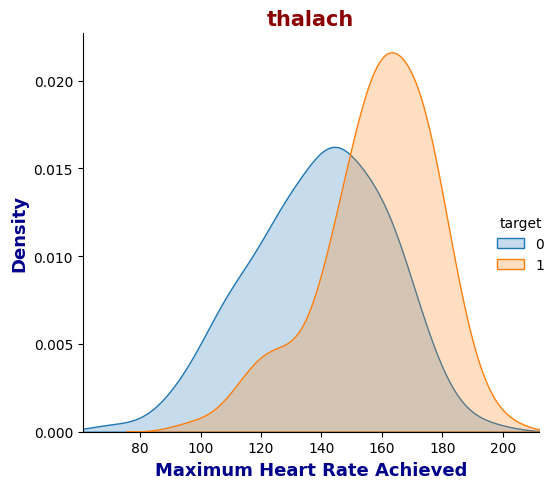

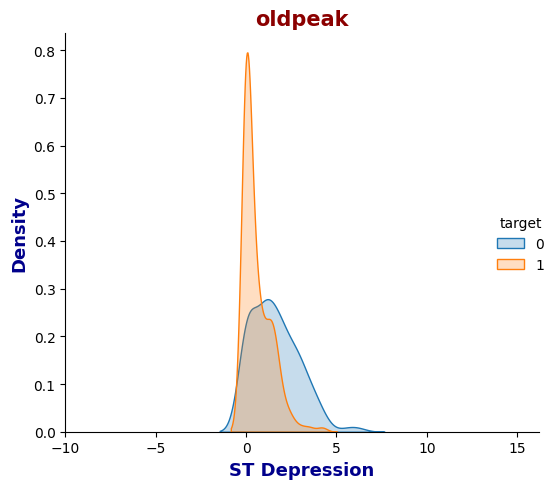

In [33]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [34]:
df[numeric_var].corr()


,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [35]:
df[numeric_var].corr().iloc[:, [-1]]


,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### My observation from Facegrid and Correlation values


##### Age and Heart Attack Risk

So, first up is age. You’d probably think, “Bhai, older people are more likely to have heart attacks, right?” That’s what most of us assume. But the graphs throw a curveball! After age 55, the risk of a heart attack actually seems to go down. The blue hump (low-risk folks) spikes up after 55, while the orange hump (high-risk ones) dips. So, this whole “age equals higher risk” idea? Not quite true here. The correlation is -0.225439, a small negative one, meaning age isn’t a big player in predicting heart attacks.

##### Resting Blood Pressure (Trtbps)

Next, we’ve got resting blood pressure, or trtbps. This one’s a bit tricky. The graphs for people with and without heart attack risk look almost identical, like they’re photocopies! Both peak around 130, and the humps overlap a ton. So, if someone’s got a trtbps of 130, it’s like, “Heart attack? Maybe, maybe not.” It’s hard to tell. The correlation is -0.144931, another tiny negative one. Basically, blood pressure alone isn’t much help in figuring out heart attack risk.

##### Cholesterol (Chol)

Now, let’s talk cholesterol. The graphs show that a cholesterol level between 200 and 250 is a bit of a danger zone. Up to 180, the data looks similar for both low-risk and high-risk folks. But from 180 to 250, the chance of a heart attack starts climbing. After 250, though, it gets hazy—hard to say who’s at risk. The correlation is -0.085239, super small and negative. So, cholesterol matters a little in that 200–250 range, but it’s not a game-changer.

##### Maximum Heart Rate (Thalach)

This one’s a biggie—maximum heart rate, or thalach. The graphs make it super clear: the higher your heart rate goes, the higher your heart attack risk. Up to 150, both groups (low and high risk) move together. But after 150, the low-risk folks drop off, while the high-risk ones keep rising. The humps are nicely split, showing a strong link. The correlation is 0.421741, positive and moderate. So, yeah, maximum heart rate is something to watch out for.

##### Oldpeak (ST Depression)

Finally, we’ve got oldpeak, which is about changes in your heart’s electrical activity. The graphs scream that if your oldpeak is between 0 and 1.5, you’re in a risky spot—heart attack chances shoot up. That 0–1.5 range is like a red alert. The humps are clearly separated, showing a solid connection. The correlation is -0.430696, negative and moderate. So, oldpeak in this range is definitely something doctors would flag.

### Categorical Variables - Target Variable(Analysis with Count Plot)

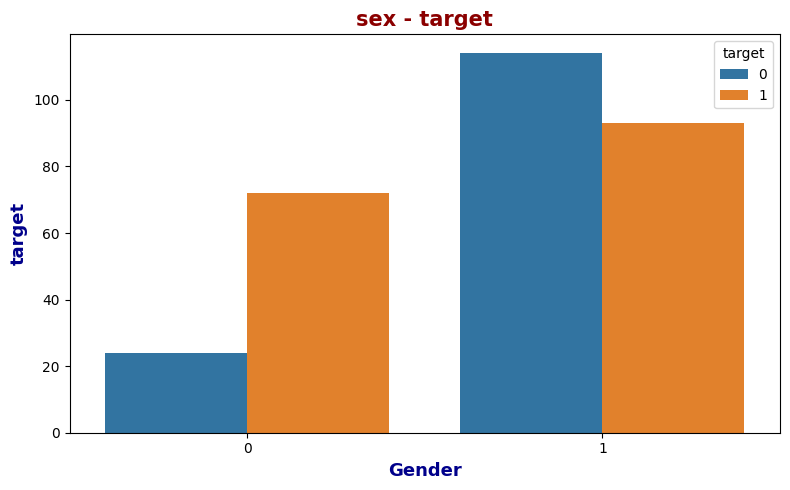

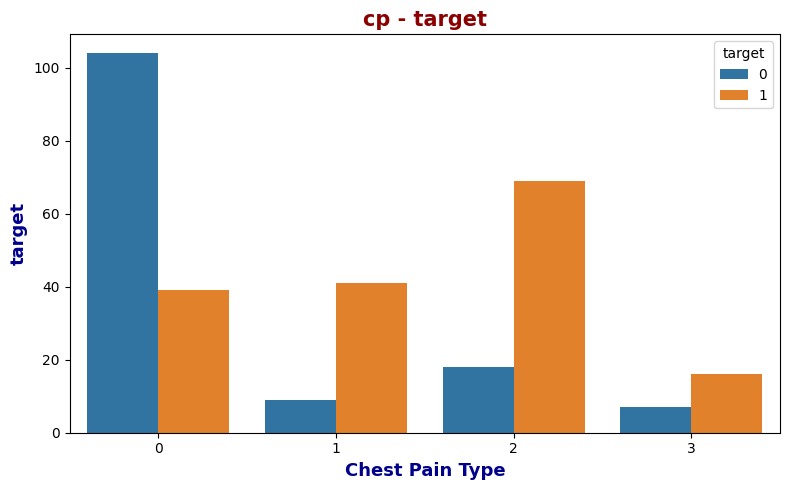

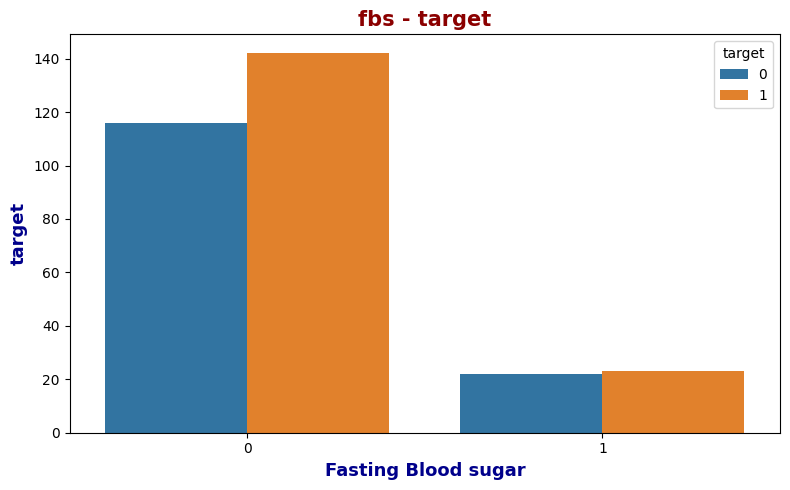

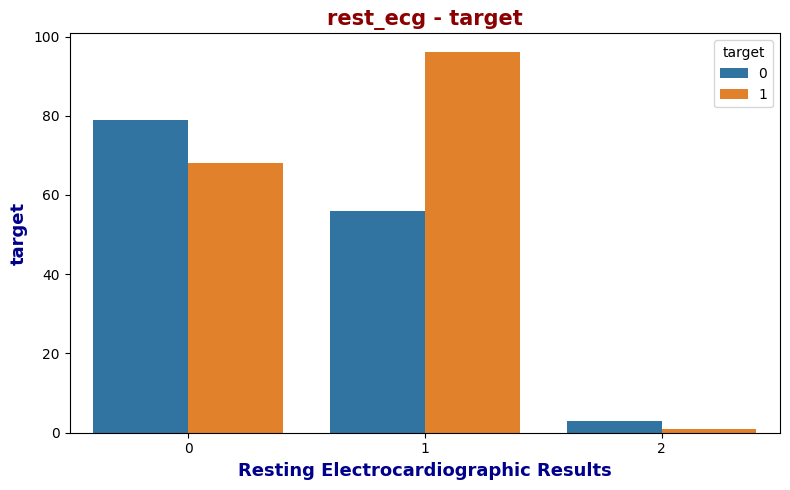

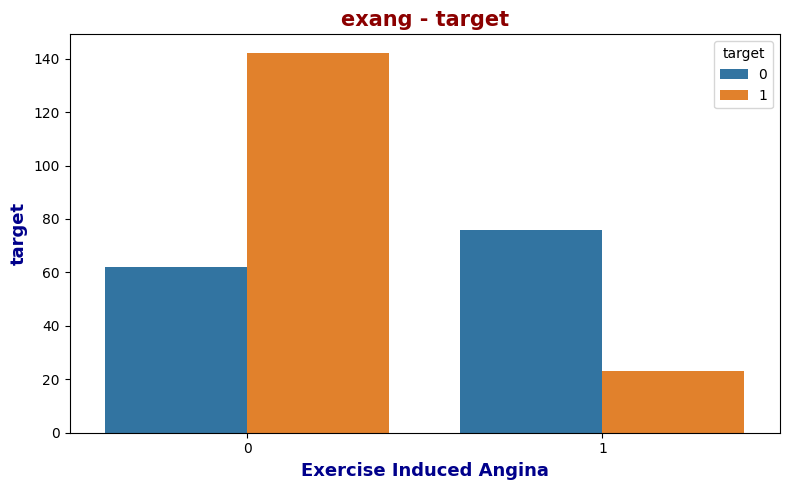

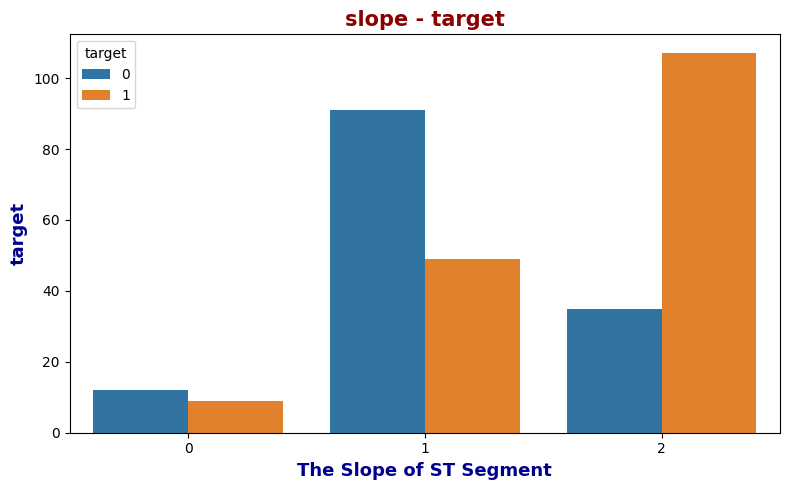

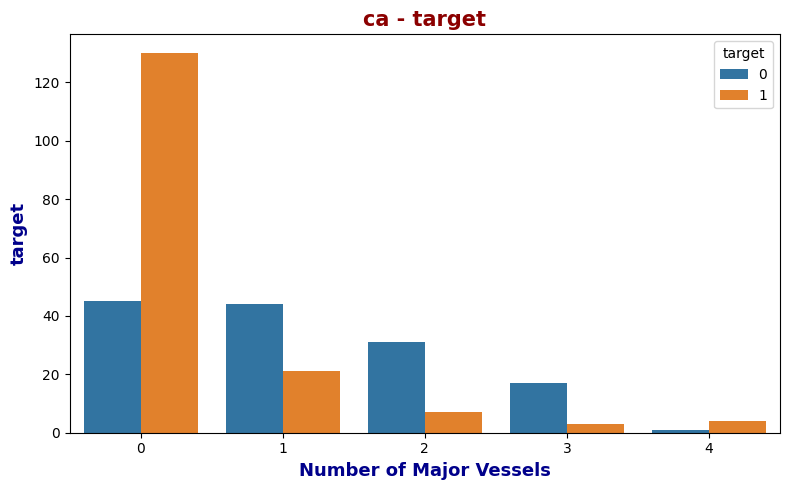

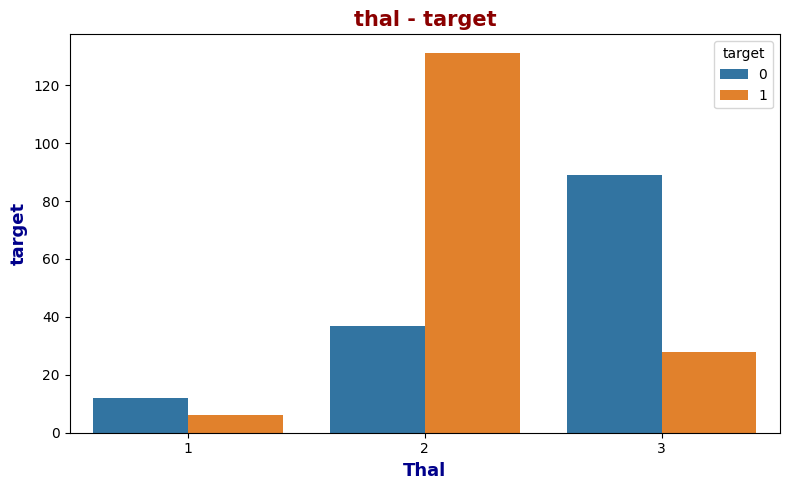

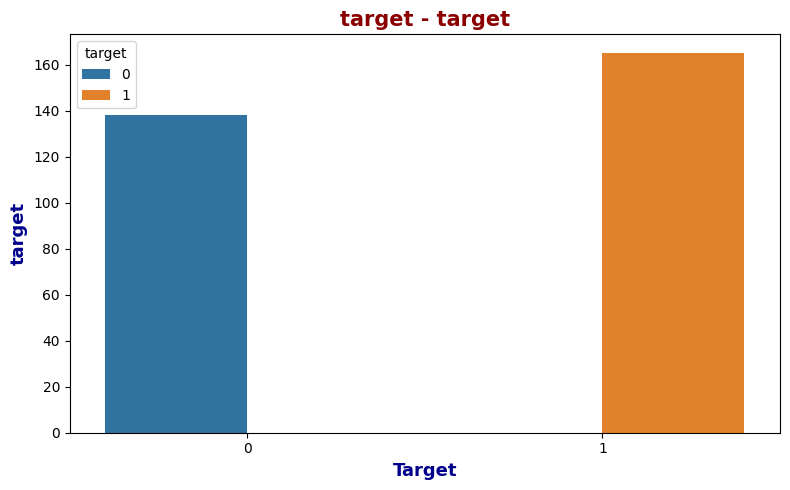

In [36]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=i, data=df[categoric_var], hue="target")  # Fixed: Use 'x=i' instead of 'i + " - target"'
    
    plt.title(i + " - target", fontdict=title_font)  # Set the title separately
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("target", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

In [37]:
df[categoric_var].corr()


,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [38]:
df[categoric_var].corr().iloc[:, [-1]]


,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


#### My observation from Countplot and Correlation values

##### Sex and Heart Attack Risk

Let’s start with the gender variable. The count plot tells us something interesting! For women (observation value 0), those at high risk of a heart attack are almost more than half of those at low risk. So, women seem to be quite vulnerable here. But for men (observation value 1), it’s a different story—the blue bar, which shows low risk, is much higher. This means men are more likely not to have a heart attack compared to having one. In short, female patients seem to be at a higher risk of heart attack compared to men. The correlation between sex and heart attack risk is -0.280937, which is a low negative correlation. So, there’s a slight trend, but not super strong.

##### Chest Pain Type (Cp)

Next up is cp, which is about chest pain type. The first bar, with an observation value of 0, represents asymptomatic pain—basically, pain without obvious symptoms. Here, patients are much less likely to have a heart attack. In fact, the probability of not having a heart attack is almost three times higher than having one! But for the other three types of pain (values 1, 2, and 3), it’s the opposite—the risk of having a heart attack is almost three times higher than not having it. So, if a patient’s cp value is 1, 2, or 3, you can say their heart attack risk is pretty high. The correlation here is 0.433798, which is a positive, moderately strong correlation. This means chest pain type is a decent predictor of heart attack risk.

##### Fasting Blood Sugar (Fbs)

Now, let’s look at fbs, or fasting blood sugar. For patients with a value of 0 (blood sugar less than 120 mg/dl), the risk of a heart attack is slightly higher than not having one. So, these patients can be considered a bit risky. But for those with a value of 1 (blood sugar greater than 120 mg/dl), the bars are almost equal—meaning the chances of having or not having a heart attack are pretty similar. It’s tough to say anything definitive about heart attack risk for these patients. The correlation is -0.028046, which is a very low negative correlation. So, fasting blood sugar doesn’t seem to be a big factor here.

##### Resting ECG (Rest_ecg)

Moving on to rest_ecg, which is about resting electrocardiogram results. Patients with a rest_ecg value of 1 need some extra attention! Their risk of having a heart attack is almost twice as high as not having one. For the other two values (0 and 2), the chances of not having a heart attack are higher. So, a rest_ecg value of 1 is a bit of a red flag. The correlation here is 0.137230, a positive but low-intensity correlation. It’s not a super strong link, but it’s worth noting.

##### Exercise-Induced Angina (Exang)

Now, let’s talk about exang, which stands for exercise-induced angina, or pain caused by exercise. Interestingly, this doesn’t seem to affect heart attack risk much. If a patient has an exang value of 1 (meaning they have exercise-related angina), they’re actually more likely not to have a heart attack. On the other hand, patients with a value of 0 (no exercise-related angina) are more likely to have a heart attack. So, exercise-related pain doesn’t seem to be connected to heart attack risk in the way you might expect. The correlation is -0.436757, which is a negative, moderately strong correlation. This means there’s a noticeable inverse relationship here.

##### Slope of the ST Segment (Slope)

Next is the slope variable, which is about the slope of the ST segment during exercise. Patients with a slope value of 2 should be on your radar! They’re three times more likely to have a heart attack than not. For the other values, 0 and 1, the risk of a heart attack is lower. Especially for a slope value of 1 (a flat slope), it’s twice as likely that the patient won’t have a heart attack. So, a slope of 2 is a warning sign. The correlation is 0.345877, a positive, moderately strong correlation, meaning this variable has a decent connection to heart attack risk.

##### Number of Major Vessels (Ca)

Let’s look at ca, which tells us the number of major vessels colored by fluoroscopy. Patients with a ca value of 0 are the risky ones here—their heart attack risk is almost three times higher than not having one. For values 1, 2, and 3, it’s the opposite; these patients are almost twice as likely not to have a heart attack. One thing stands out, though: even though there are fewer patients with a ca value of 4, their risk of having a heart attack is higher. So, that’s something to keep an eye on. The correlation is -0.363322, a negative, moderately strong correlation, showing a clear inverse relationship.

##### Thalassemia (Thal)

Finally, we have thal, which is about thalassemia, a blood disorder. Patients with a thal value of 2 are three times more likely to have a heart attack than not, so that’s a big red flag. For the other values, the chances of not having a heart attack are higher. The correlation is -0.363322, again a negative, moderately strong correlation, similar to the ca variable. So, thalassemia type does have a noticeable impact on heart attack risk.

### Feature Scaling with the RobustScaler Method

In [39]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [40]:
numeric_var.remove("target")


In [41]:
df[numeric_var].head()


,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [42]:
from sklearn.preprocessing import RobustScaler


In [43]:
robust_scaler = RobustScaler()


In [44]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])


In [45]:
scaled_data


array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [46]:
type(scaled_data)


numpy.ndarray

In [47]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


#### Creating a New DataFrame with the Melt() Function

In [48]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)


In [49]:
df_new.head()


,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [50]:
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables", value_name = "value")


In [51]:
melted_data


,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


### Numerical Variables - Categorical Variables (Analysis with Swarm Plot)

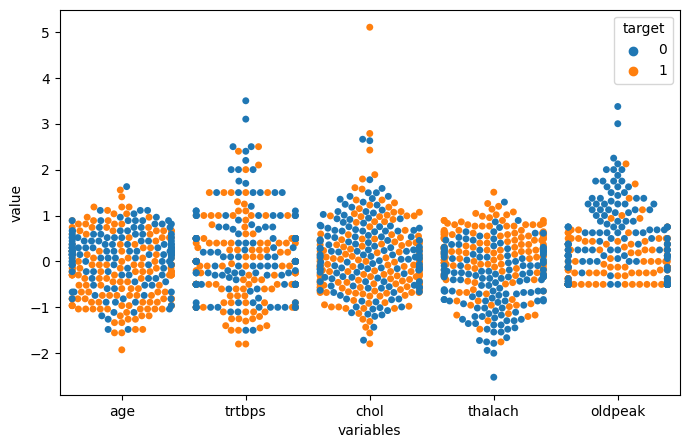

In [52]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value", hue = "target", data = melted_data)
plt.show()


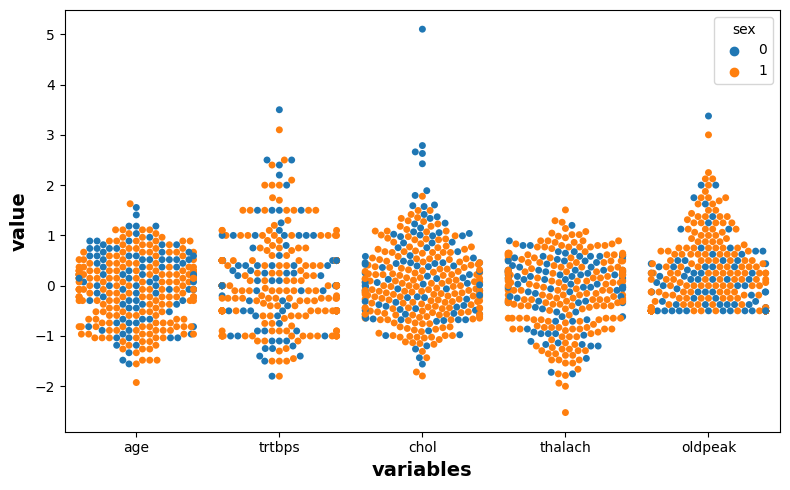

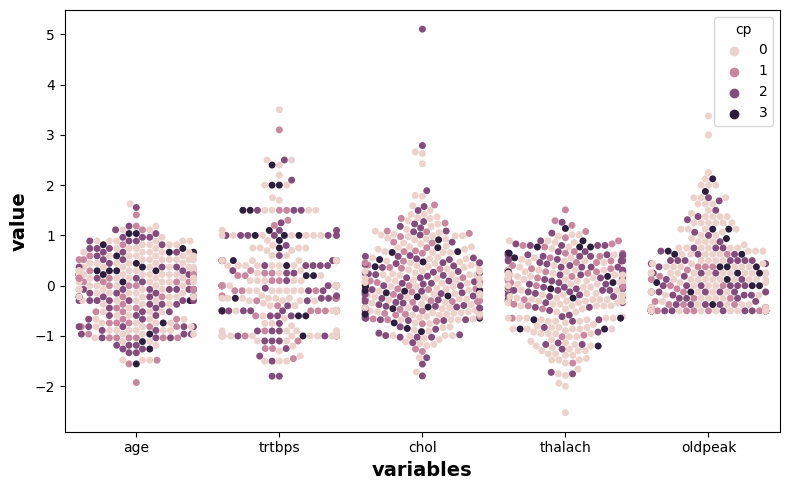

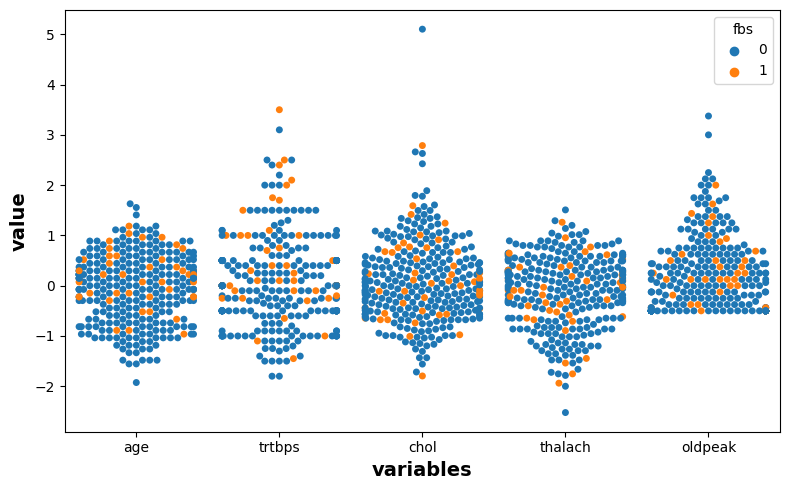

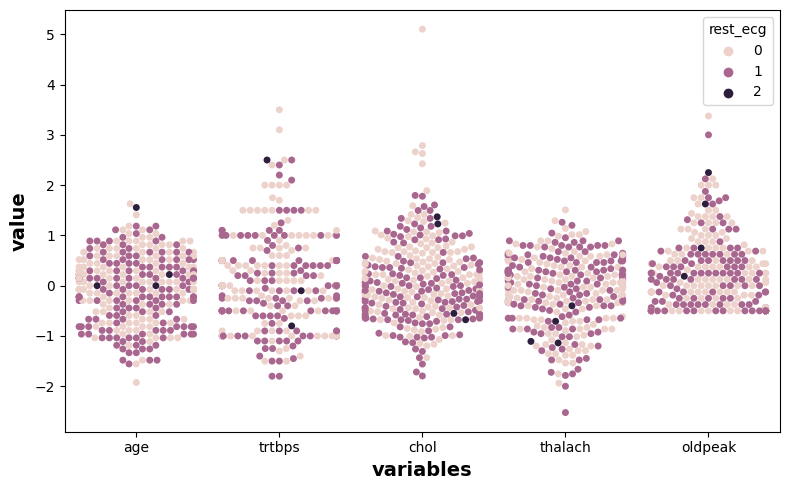

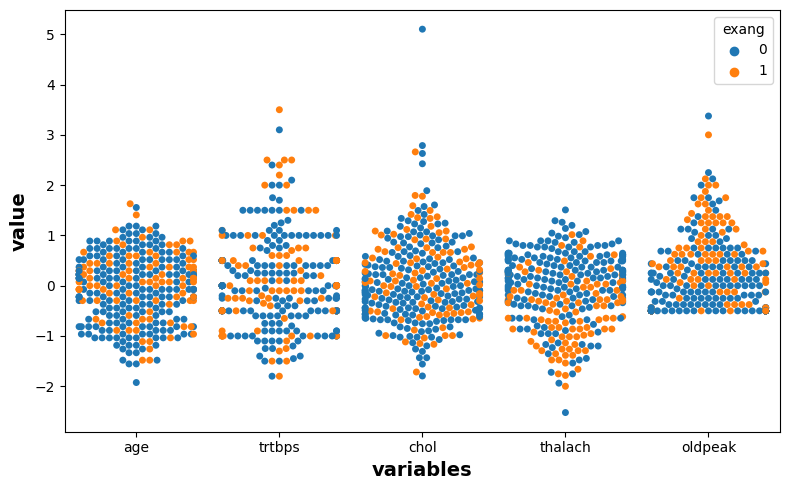

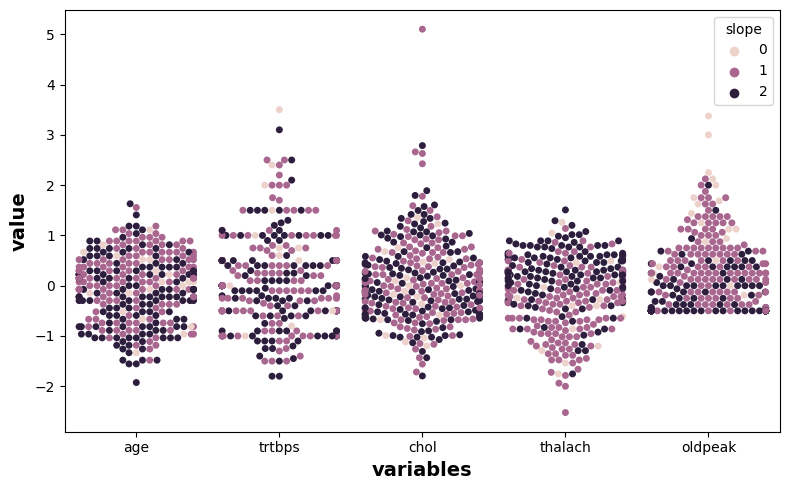

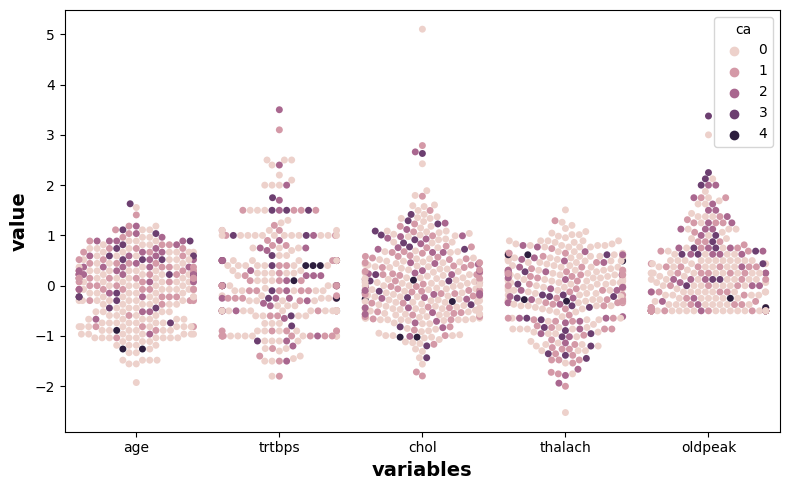

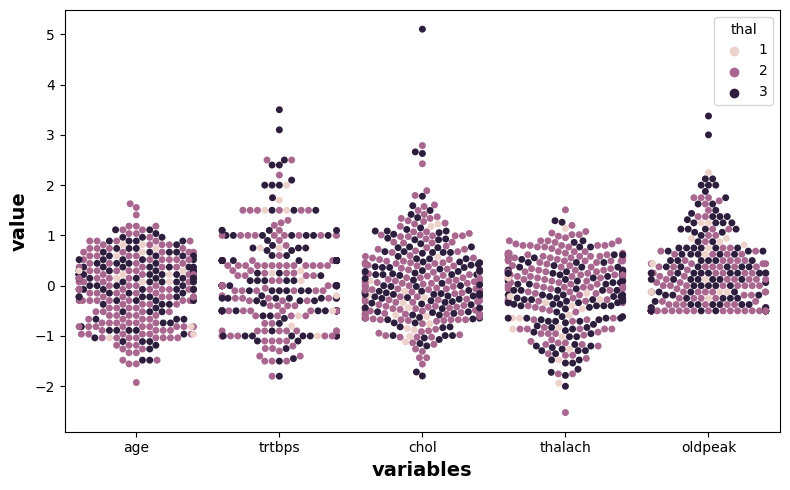

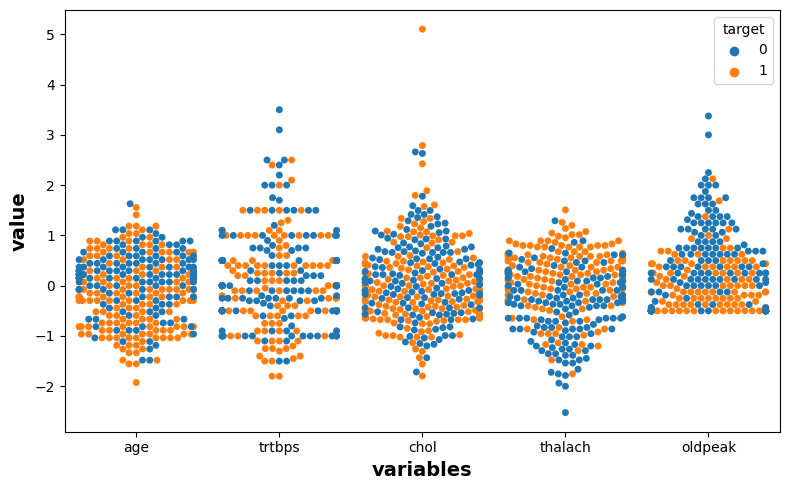

In [53]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### My Observations from the swarm plots


##### Sex and Numerical Variables

First up, we have the sex variable in the swarm plot. When we look at how sex (male or female) interacts with numerical variables like age, thalach, and so on, the colors representing males and females are all mixed up. It’s really hard to tell them apart! This tells us that there’s no clear pattern or separation between men and women when it comes to these numerical variables. In short, the relationship between sex and the numerical variables is pretty weak. So, sex doesn’t seem to have a strong connection with things like age or heart rate in this context.

##### Chest Pain Type (Cp) and Numerical Variables

Next, let’s talk about cp, which is chest pain type. Out of all the numerical variables, the one that shows the most connection with cp is thalach (maximum heart rate). In the swarm plot, the colors for different cp values form separate clusters, though it’s not super clear—it’s just slight. Especially for cp value 0 (asymptomatic pain), the points stand out a bit more distinctly. So, we can say chest pain has a moderate correlation with maximum heart rate. But for the other numerical variables like age or oldpeak, the points are all intertwined, and there’s no clear separation. That means there’s not much correlation between cp and those other variables.

##### Fasting Blood Sugar (Fbs) and Numerical Variables

Now, let’s check out fbs, which is fasting blood sugar. In the swarm plot, the orange points (likely representing fbs value 1, meaning blood sugar > 120 mg/dl) are much fewer in number and are scattered all over the blue points (fbs value 0). There’s no clear clustering or pattern here. So, none of the numerical variables—like age, thalach, or oldpeak—show a strong correlation with fbs. It’s all too messy to say there’s any meaningful relationship here.

##### Resting ECG (Rest_ecg) and Numerical Variables

Moving on to rest_ecg, which is about resting electrocardiogram results. The swarm plot here is quite complex—the colors for different rest_ecg values (0, 1, 2) are all jumbled up when plotted against numerical variables like age or thalach. There’s no clear separation or clustering, so it’s safe to say there’s no strong relationship between rest_ecg and the numerical variables. The lack of distinct patterns means the correlation is pretty weak.

##### Exercise-Induced Angina (Exang) and Numerical Variables

Let’s look at exang, which is exercise-induced angina. Here, the numerical variable that shows the strongest connection with exang is thalach (maximum heart rate). In the swarm plot, the orange dots (exang value 1, meaning they have exercise-induced angina) are clustered lower, while the blue dots (exang value 0) are higher up. That’s a decent separation! There’s also a noticeable relationship with oldpeak (ST depression)—not as strong as with thalach, but still moderate. The orange and blue dots show some clustering there too. For the other numerical variables, though, the colors are all mixed up and messy, so the correlation with them is low. Exang mainly seems to connect with thalach and oldpeak.

##### Slope of the ST Segment (Slope) and Numerical Variables

Now, let’s talk about slope, which is the slope of the ST segment during exercise. The swarm plot shows that slope has the strongest relationship with thalach (maximum heart rate) and oldpeak (ST depression). For these two variables, the colors for different slope values (0, 1, 2) can be seen in separate clusters, which is a good sign of some correlation. But when we look at the other numerical variables—like age or trtbps—the colors are very homogeneously mixed, and it’s hard to distinguish any pattern. So, there’s a low correlation with those other variables. Slope mainly seems to matter for thalach and oldpeak.

##### Number of Major Vessels (Ca) and Numerical Variables

Next up is ca, which is the number of major vessels colored by fluoroscopy. The swarm plot shows that ca has some correlation with age, thalach, and oldpeak. You can see a bit of distinction between the colors for different ca values (0, 1, 2, 3, 4) when plotted against these variables. But it’s not a super strong separation—it’s more like a below-middle-level correlation. For the other numerical variables, the points are too mixed up to show any meaningful relationship. So, ca has a slight connection with age, thalach, and oldpeak, but nothing too significant.

##### Thalassemia (Thal) and Numerical Variables

Let’s check out thal, which is about thalassemia. The swarm plot shows that thal has a bit of a relationship with oldpeak and thalach. The colors for different thal values (like 1, 2, 3) are a little more evenly clustered when plotted against these two variables, which suggests a mild correlation. For the other numerical variables, though, the points are too scattered to show any clear pattern. So, thal mainly has a slight connection with oldpeak and thalach, but it’s not very strong overall.

##### Target (Heart Attack Risk) and Numerical Variables

Finally, let’s look at the target variable itself, which is whether a patient has a high or low risk of a heart attack. The swarm plot shows that the numerical variables with the strongest relationship to the target are thalach (maximum heart rate) and oldpeak (ST depression). The colors for high and low risk (blue and orange) form distinct clusters when plotted against these two variables, which is a good sign of correlation. But for the other numerical variables—like age or trtbps—the colors are distributed very homogeneously, meaning there’s not much of a relationship. So, we can say there’s a low-level correlation with those other variables. Thalach and oldpeak are the key players here when it comes to predicting heart attack risk.

##### My conclusion

So, from these swarm plots? Thalach (maximum heart rate) and oldpeak (ST depression) seem to have the most consistent relationships with categorical variables like cp, exang, slope, thal, and even the target itself—they show moderate correlations with clear clustering. Age also pops up with a slight correlation to ca. But for variables like fbs and rest_ecg, there’s hardly any connection with the numerical variables—the points are too scattered. Sex also doesn’t show much of a relationship with numerical variables. This tells us that if we’re looking to predict heart attack risk, focusing on thalach and oldpeak alongside these categorical variables might give us the best insights. Pretty cool, right?

### Relationships between variables(Analysis with Heatmap)

In [54]:
df_scaled


,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [55]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)


In [56]:
df_new2


,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [57]:
df_new2.corr()


,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


<Axes: >

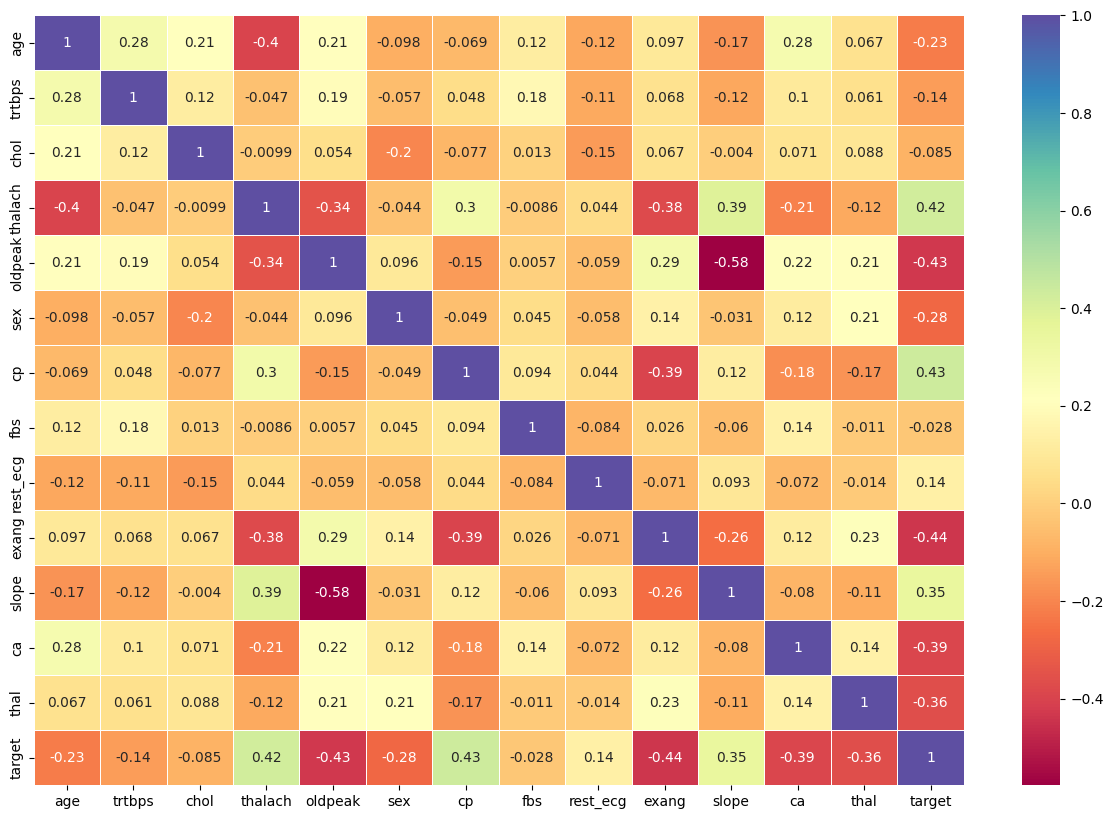

In [58]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

#### My Observations from the Heatmap

##### Age Variable

The variable with the highest correlation to age is thalach (maximum heart rate), with a correlation of -0.40. This is a moderate negative correlation, meaning there’s an inverse relationship. Simply put, as age increases, the maximum heart rate tends to decrease.

##### Trtbps Variable (Resting Blood Pressure)

Trtbps has its highest correlation with age, at 0.28. This is a low positive correlation, indicating that as age increases, resting blood pressure slightly increases.

##### Chol Variable (Cholesterol)

The chol variable correlates most with age, showing a correlation of 0.21. This is a low positive correlation, so we can say that cholesterol levels tend to rise slightly as age increases.

##### Thalach Variable (Maximum Heart Rate)

Thalach has the strongest correlation with the target variable (heart attack risk), at 0.42—a positive, moderate correlation. This suggests that maximum heart rate can directly influence heart attack risk. Thalach also correlates with several other variables, hinting that it might be influenced by multiple factors.

##### Oldpeak Variable (ST Depression)

Oldpeak has the highest correlation in the table with the slope variable, at -0.58—a negative correlation just above moderate intensity. The next strongest correlation is with the target variable, showing a notable inverse relationship.

##### Sex Variable

The sex variable doesn’t show strong correlations with any variable. Its highest correlation is with the target variable, at -0.28, indicating a low negative correlation. This aligns with our earlier finding that women (sex=0) are at higher risk of heart attack.

##### Cp Variable (Chest Pain Type)

Cp has strong correlations with thalach, exang, and target. The highest is with target, at 0.43 (positive, moderate correlation), showing a direct relationship. This matches our count plot insight that cp values 1, 2, and 3 increase heart attack risk.

##### Fbs Variable (Fasting Blood Sugar)

Fbs generally shows weak correlations with other variables. Its highest correlation is with trtbps, at 0.18—a low positive correlation. So, as fasting blood sugar increases, resting blood pressure tends to rise slightly.

##### Rest_ecg Variable (Resting ECG)

Rest_ecg doesn’t have strong correlations with any variable. Its highest correlation is with target, at 0.14—a positive, low-intensity correlation, suggesting a weak link to heart attack risk.

##### Exang Variable (Exercise-Induced Angina)

Exang has its highest correlation with the target variable, at -0.44—a negative, moderate correlation. It also correlates with other variables like thalach, which we saw in the swarm plots (orange dots clustering lower for exang=1).

#### Slope Variable

Slope has the strongest correlation with oldpeak, at 0.58—the highest in the table, showing an above-moderate positive relationship. It also has moderate correlations with thalach and target, but its relationship with other variables is weak.

##### Ca Variable (Number of Major Vessels)

Ca correlates most with the target variable, at -0.39—a negative, moderate correlation. It also has a low positive correlation with age (0.28), meaning the number of major vessels might slightly increase with age.

##### Thal Variable (Thalassemia)

Thal has its highest correlation with the target variable, at -0.36—a negative, moderate correlation. Its correlations with other variables aren’t very strong.

##### Target Variable (Heart Attack Risk)

The target variable correlates with multiple variables, like thalach (0.42), exang (-0.44), cp (0.43), oldpeak, slope, ca, and thal. However, these relationships are generally below moderate intensity, showing that heart attack risk is influenced by several factors, but none overwhelmingly so.

### Dropping Columns with Low Correlation

In [59]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)


In [61]:
df.head()


,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


### Vizualizing Outliers and Dealing with them

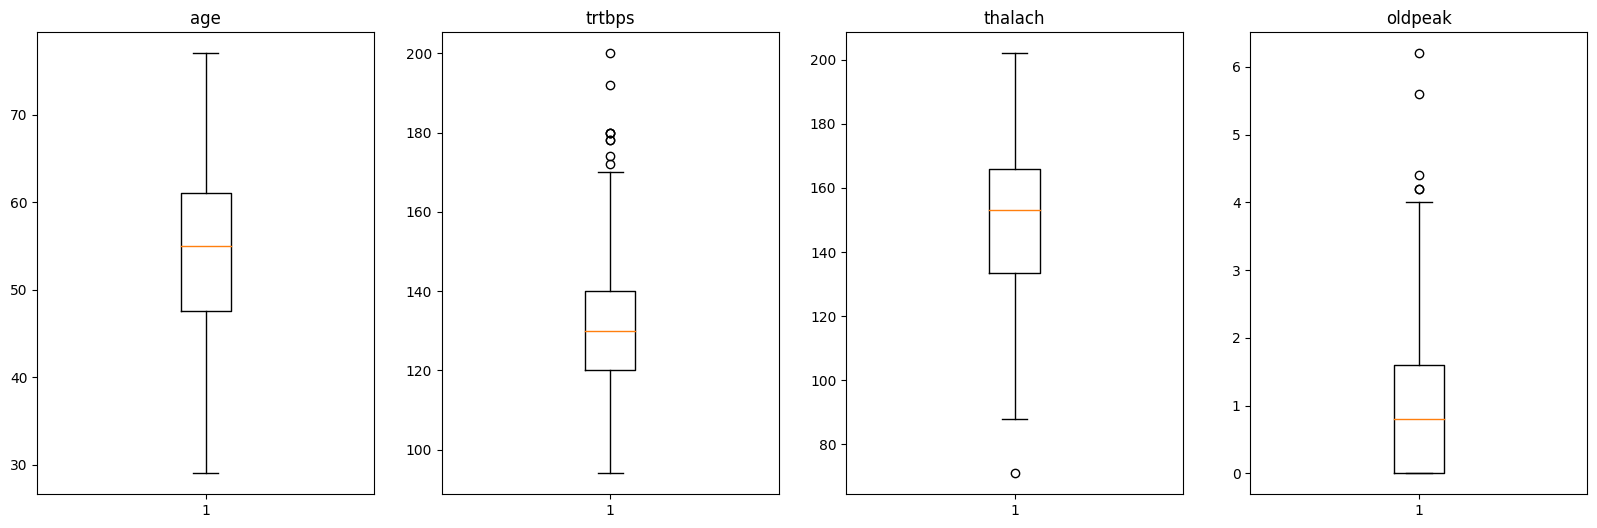

In [62]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

#### My Observation

##### Age Variable
We can see the exact image we want in this variable. There are no outliers, and the box stands at the midpoint of the whiskers.

##### Trtbps Variable
There are more outliers in the "trtbps" variable than the others. In terms of distribution, it is close to normal. The box appears near the middle of the two whiskers.

##### Thalach Variable
There are very few outliers, with one outlier below the whisker. The distribution is somewhat close to normal, but the box is slightly shifted upwards, meaning data is more concentrated on the right. In summary, there is a slight left skew.

##### Oldpeak Variable
There is no lower whisker in the Oldpeak variable. The bottom of the box is at the level of the lower whisker, showing values are concentrated on the left. This indicates a right skew. Outliers are visible above the upper whisker.


In [63]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

#### Dealing with outliers in Trtbps Variable

In [64]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [65]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps < threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 252
-------------------
Threshold Value: 2
Number of Outliers: 290
-------------------
Threshold Value: 3
Number of Outliers: 301
-------------------


In [66]:
df[z_scores_trtbps > 2][["trtbps"]]


,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [67]:
df[z_scores_trtbps > 2].trtbps.min()


170

In [68]:
df[df["trtbps"] < 170].trtbps.max()


165

In [69]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [70]:
1 - winsorize_percentile_trtbps


0.04290429042904298

In [71]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

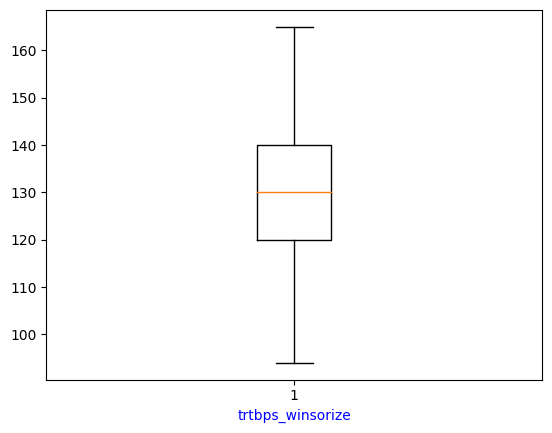

In [72]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [73]:
df["trtbps_winsorize"] = trtbps_winsorize


In [74]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


#### Dealing with outliers in Thalach Variable

In [75]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [76]:
thalach_out = iqr(df, "thalach")


In [77]:
thalach_out


,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [78]:
df.drop([272], axis = 0, inplace = True)


In [79]:
df["thalach"][270:275]


270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

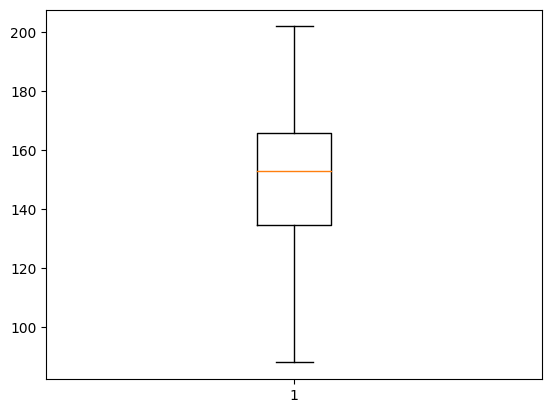

In [80]:
plt.boxplot(df["thalach"]);


#### Dealing with outliers in Oldpeak Variable

In [81]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [82]:
iqr(df, "oldpeak")


,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [83]:
df[df["oldpeak"] < 4.2].oldpeak.max()


4.0

In [84]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [85]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

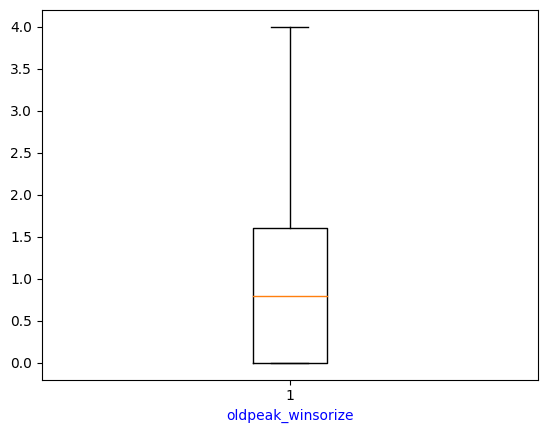

In [86]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [87]:
df["oldpeak_winsorize"] = oldpeak_winsorize


In [88]:
df.head()


,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [89]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)


In [90]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


#### Determining Distributions of Numeric Variables

In [91]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


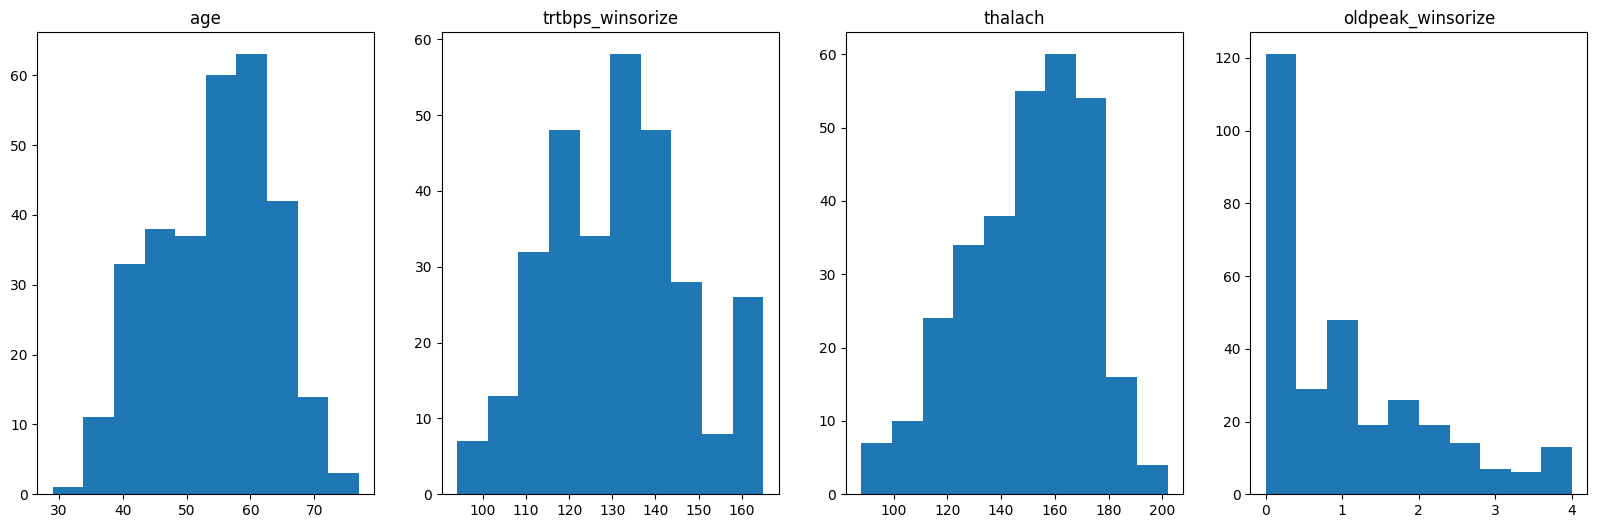

In [92]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [93]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


#### Transformation Operations on Unsymmetrical Data

In [94]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [95]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [96]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [97]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

In [98]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


#### Applying One Hot Encoding Method to Categorical Variables

In [99]:
df_copy = df.copy()


In [100]:
df_copy.head()


,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [101]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [102]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [103]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [104]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [105]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,True,False,False,True,False,False,False,False,False,False,False,False,False
1,37,187,1,130,1.870829,True,False,True,False,False,False,False,False,False,False,False,True,False
2,41,172,1,130,1.183216,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,178,1,120,0.894427,True,True,False,False,False,False,True,False,False,False,False,True,False
4,57,163,1,120,0.774597,False,False,False,False,True,False,True,False,False,False,False,True,False


In [106]:
for col in df_copy.columns:
    if col != 'oldpeak_winsorize_sqrt':
        df_copy[col] = df_copy[col].astype(int)

In [107]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


### Feature Scaling with the RobustScaler Method for Machine Learning Algorithms

In [108]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [109]:
robus_scaler = RobustScaler()

In [110]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [111]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0


### Separating Data into Test and Training Set

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [115]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,1,0,0,0,1,1,0,1,0,0,0,0,1
82,0.363636,0.222222,-1.40,-0.707107,0,0,1,0,0,0,1,1,0,0,0,1,0
187,-0.072727,-1.396825,-0.30,0.465497,1,0,0,0,1,1,0,1,0,0,0,0,1
259,-1.236364,0.920635,-0.50,0.833997,1,0,0,1,1,1,0,0,0,0,0,0,1
5,0.145455,-0.158730,0.50,-0.207107,1,0,0,0,0,1,0,0,0,0,0,0,0


In [116]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [117]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


## Modelling

#### Logistic Regression Algorithm

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [119]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [120]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred = log_reg.predict(X_test)


In [122]:
y_pred


array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


#### Logistic Regression Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())


Cross-Validation Accuracy Scores 0.8666666666666666


In [126]:
from sklearn.metrics import RocCurveDisplay

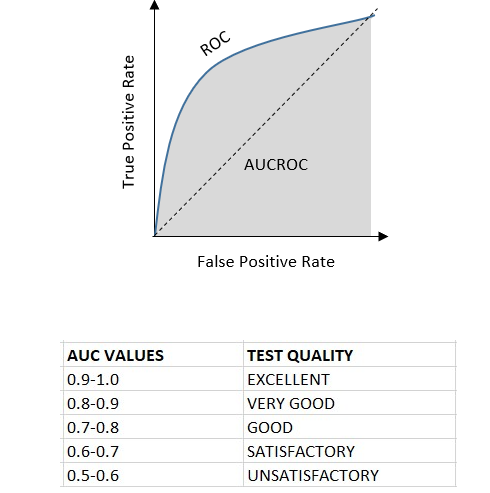

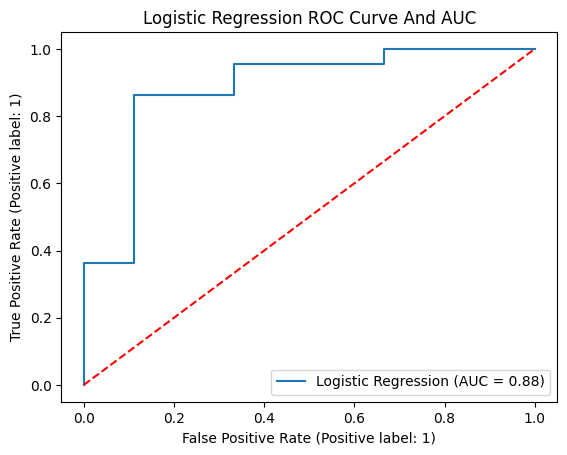

In [127]:
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name="Logistic Regression")

plt.title("Logistic Regression ROC Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line
plt.show()

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [130]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [131]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [132]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [133]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [134]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [135]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [136]:
y_pred = log_reg_new2.predict(X_test)

In [137]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


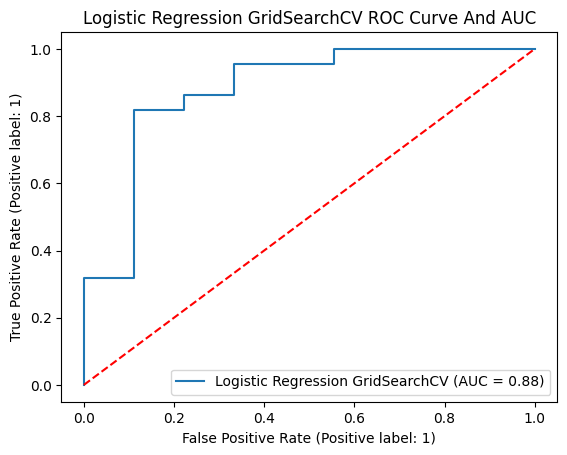

In [138]:
RocCurveDisplay.from_estimator(log_reg_new2, X_test, y_test, name="Logistic Regression GridSearchCV")

plt.title("Logistic Regression GridSearchCV ROC Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")  # Random guess line
plt.show()